### Handling imports from pandas, numpy, basemap & sklearn

In [1]:
#Set charts to view inline;(directive '%')
%matplotlib inline
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

from sklearn import preprocessing as prep
from datetime import datetime

import warnings
##suppress all warnings
warnings.filterwarnings("ignore")

#### Index by CaseNumber  && Cleaning 'DeathLoc' coordinates 

In [2]:
ADRD = 'Accidental_Drug_Related_Deaths__2012-2017.csv'
ORTA ='Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv'
df = pd.read_csv(ADRD, index_col='CaseNumber',parse_dates=['Date'])
#list comprehension:
df['DeathLoc'] = [i.split("\n") for i in df['DeathLoc']]
df['DeathLoc'] =[i[1].strip('()').split(',') for i in df['DeathLoc']]
df.head()

,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine (not heroin),Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
CaseNumber,,,,,,,,,,,,,,,,,,,,,
13-16336,2013-11-09,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,NEW LONDON,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"[41.343693, -72.07877]"
12-18447,2012-12-29,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"[41.554261, -73.043069]"
14-2758,2014-02-18,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"[41.976501, -72.591985]"
14-13497,2014-09-07,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"[41.454408, -72.818414]"
13-14421,2013-10-04,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"[41.272336, -72.949817]"


<br><br>
#### Cleaning and mapping data

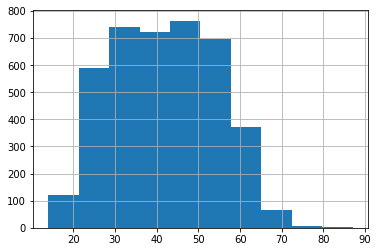

In [3]:
df['Age'].hist()
#skewed right:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [4]:
drugList = [
'Heroin',
'Cocaine',              
'Fentanyl',               
'Oxycodone',                 
'Oxymorphone',               
'EtOH',                     
'Hydrocodone',              
'Benzodiazepine',           
'Methadone',                 
'Amphet',                    
'Tramad'
]


df['Gender_Dummy'] = df.Sex.map({'Male': 0, 'Female': 1})

# an issue arrised with fillna(0) producing a value that was seen to the mapper as NaN.
# solution: fillna('N') and assign back to column. mapping works properly.
for drug in drugList:
    print(drug)
    df[drug] = df[drug].fillna('N')
    df[drug + "_Mapped"] = pd.Series(df[drug]).map({'Y': 1, 'y': 1, 'N': 0, np.nan: 0})



Heroin
Cocaine
Fentanyl
Oxycodone
Oxymorphone
EtOH
Hydrocodone
Benzodiazepine
Methadone
Amphet
Tramad


In [5]:
#df[['Heroin_Mapped','Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH',
#       'Hydrocodone', 'Benzodiazepine', 'Methadone']].head()
# df.keys()

 I mapped the np.nan values above to 0 but there are still three null values in Heroin

In [6]:
df.groupby('Cocaine').agg('count')

,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,Cocaine_Mapped,Fentanyl_Mapped,Oxycodone_Mapped,Oxymorphone_Mapped,EtOH_Mapped,Hydrocodone_Mapped,Benzodiazepine_Mapped,Methadone_Mapped,Amphet_Mapped,Tramad_Mapped
Cocaine,,,,,,,,,,,,,,,,,,,,,
N,2907,2905,2901,2908,2847,1530,2375,2906,1564,2097,...,2908,2905,2907,2908,2898,2907,2908,2908,2908,2908
Y,1167,1167,1164,1168,1120,609,979,1166,631,797,...,1168,1167,1168,1167,1160,1168,1168,1168,1168,1168
y,5,5,5,5,3,3,3,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [7]:
df.Heroin.isnull().sum()

0

<br><br>
### Building a Matrices for Race

In [8]:
df.groupby('Race').agg('count')

,Date,Sex,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,Location,...,Cocaine_Mapped,Fentanyl_Mapped,Oxycodone_Mapped,Oxymorphone_Mapped,EtOH_Mapped,Hydrocodone_Mapped,Benzodiazepine_Mapped,Methadone_Mapped,Amphet_Mapped,Tramad_Mapped
Race,,,,,,,,,,,,,,,,,,,,,
Asian Indian,9,9,9,9,7,9,9,7,5,9,...,9,9,9,9,9,9,9,9,9,9
"Asian, Other",14,14,14,14,7,12,14,7,10,14,...,14,14,14,14,14,14,14,14,14,14
Black,329,329,329,318,174,284,328,179,235,326,...,329,329,329,329,328,329,329,329,329,329
Chinese,2,2,2,2,1,2,2,1,1,2,...,2,2,2,2,2,2,2,2,2,2
Hawaiian,1,1,1,1,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
"Hispanic, Black",17,17,17,15,10,12,17,12,13,17,...,17,17,17,17,16,17,17,17,17,17
"Hispanic, White",431,429,431,406,223,348,431,235,294,429,...,431,430,431,431,431,431,431,431,431,431
"Native American, Other",1,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Other,7,7,7,6,3,5,7,4,6,7,...,7,7,7,7,7,7,7,7,7,7


### Cleaning up column headers (", ")

In [9]:
race_dummies = pd.get_dummies(df.Race, prefix='race')
## list comprehension to replace column headers with space and comma
race_dummies.columns = [col.replace(', ', '_') for col in race_dummies.columns]
race_dummies.head()

,race_Asian Indian,race_Asian_Other,race_Black,race_Chinese,race_Hawaiian,race_Hispanic_Black,race_Hispanic_White,race_Native American_Other,race_Other,race_Unknown,race_White
CaseNumber,,,,,,,,,,,
13-16336,0,0,0,0,0,0,0,0,0,0,1
12-18447,0,0,0,0,0,0,0,0,0,0,1
14-2758,0,0,0,0,0,0,0,0,0,0,1
14-13497,0,0,0,0,0,0,0,0,0,0,1
13-14421,0,0,0,0,0,0,0,0,0,0,1


In [10]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, race_dummies], axis=1)
df.head()

,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,Death County,...,race_Asian_Other,race_Black,race_Chinese,race_Hawaiian,race_Hispanic_Black,race_Hispanic_White,race_Native American_Other,race_Other,race_Unknown,race_White
CaseNumber,,,,,,,,,,,,,,,,,,,,,
13-16336,2013-11-09,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,NEW LONDON,...,0,0,0,0,0,0,0,0,0,1
12-18447,2012-12-29,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,NEW HAVEN,...,0,0,0,0,0,0,0,0,0,1
14-2758,2014-02-18,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
14-13497,2014-09-07,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,NEW HAVEN,...,0,0,0,0,0,0,0,0,0,1
13-14421,2013-10-04,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,NEW HAVEN,...,0,0,0,0,0,0,0,0,0,1


<br><br>
## Correlations:

In [11]:
df['Fentanyl_Mapped'] = df.Fentanyl_Mapped.fillna(0)

In [12]:
df.Fentanyl_Mapped.isnull().sum()

0

In [13]:
df.corr()

,Age,Gender_Dummy,Heroin_Mapped,Cocaine_Mapped,Fentanyl_Mapped,Oxycodone_Mapped,Oxymorphone_Mapped,EtOH_Mapped,Hydrocodone_Mapped,Benzodiazepine_Mapped,...,race_Asian_Other,race_Black,race_Chinese,race_Hawaiian,race_Hispanic_Black,race_Hispanic_White,race_Native American_Other,race_Other,race_Unknown,race_White
Age,1.000000,0.037957,-0.166655,0.046642,-0.117941,0.130579,0.032295,0.076050,0.087084,0.039246,...,-0.031869,0.120545,-0.031933,0.020642,-0.006160,0.026403,0.002846,-0.015063,-0.012156,-0.092200
Gender_Dummy,0.037957,1.000000,-0.120655,-0.028428,-0.095061,0.067299,0.023500,-0.053271,0.076224,0.092213,...,0.021538,-0.003334,0.011708,-0.009438,-0.004549,-0.065592,-0.009438,-0.011588,-0.020074,0.051106
Heroin_Mapped,-0.166655,-0.120655,1.000000,0.001979,-0.007777,-0.275448,-0.137549,-0.035802,-0.098654,-0.137380,...,0.013765,-0.077487,0.021038,-0.016490,0.000475,0.038261,-0.016490,-0.008070,0.012475,0.021949
Cocaine_Mapped,0.046642,-0.028428,0.001979,1.000000,0.013953,-0.124634,-0.059237,-0.036144,-0.058068,-0.145591,...,-0.009483,0.171903,-0.014063,-0.009943,-0.007451,0.061868,-0.009943,0.012928,-0.005189,-0.159684
Fentanyl_Mapped,-0.117941,-0.095061,-0.007777,0.013953,1.000000,-0.149866,-0.092201,-0.020319,-0.071998,-0.053128,...,-0.000075,-0.027605,-0.016527,-0.011685,0.039035,0.021303,-0.011685,-0.006230,0.010437,-0.004051
Oxycodone_Mapped,0.130579,0.067299,-0.275448,-0.124634,-0.149866,1.000000,0.324785,0.015766,0.048523,0.134853,...,-0.010206,-0.042139,-0.008557,-0.006050,-0.002358,-0.047407,-0.006050,0.001598,0.010750,0.066513
Oxymorphone_Mapped,0.032295,0.023500,-0.137549,-0.059237,-0.092201,0.324785,1.000000,-0.006749,-0.004593,0.062617,...,-0.009109,-0.045973,-0.003438,-0.002431,-0.010041,-0.037567,-0.002431,-0.006435,0.042004,0.054906
EtOH_Mapped,0.076050,-0.053271,-0.035802,-0.036144,-0.020319,0.015766,-0.006749,1.000000,0.042731,-0.007644,...,-0.011742,0.021004,-0.012007,-0.008489,0.022320,-0.022139,-0.008489,0.020064,0.003541,-0.001020
Hydrocodone_Mapped,0.087084,0.076224,-0.098654,-0.058068,-0.071998,0.048523,-0.004593,0.042731,1.000000,0.049311,...,-0.009490,-0.025052,-0.003582,-0.002532,-0.010462,-0.030287,0.096812,-0.006705,-0.010148,0.032184
Benzodiazepine_Mapped,0.039246,0.092213,-0.137380,-0.145591,-0.053128,0.134853,0.062617,-0.007644,0.049311,1.000000,...,0.004536,-0.097325,0.012639,0.026962,-0.020032,-0.083859,-0.009090,0.003204,-0.018369,0.134519


In [14]:
# In this example, we will try to predict the value of Apple stock at stock market closing
# using the value of it's highest cost during a given day.  In other words, we will try 
# to predict the value of 'close' using the value of 'high'
# To put this in machine learning / data mining terms, 'close' is our response variable and 
# 'high' our predictor variable
X = df[['Fentanyl_Mapped', 'Age']]
y = df[['race_Hispanic_White']]

### Split Data - Training data - train_test_split

In [15]:
# Split Data
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # test size 20%, random = True

### Training Model 
fit - learning a model
X_train, Y_train = 80% of data

In [16]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, 
# which is an array of tuples of coefficients.
# Each regression coefficient shows the strength of the relationship between the predictor variable and the
# outcome variable while controlling for the other predictor variable 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Fentanyl_Mapped is 0.016524459007916756
The coefficient for Age is 0.0008158320245424961


In [18]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.06602000762723241


Now that we know the regression coefficient for our predictor variable and the intercept, we can figure out our model:

ŷ = 0.2680893 + 0.29794x


y = 0.2680893 + 0.29794()<br>
Predicted= 000<br>
Acutal =  000

In [19]:
regression_model.score(X_test, y_test)

0.00019777349148475398

# Task: 

<ul>
<li>Join housing data with Death based on town as PK</li>
<li>Deaths per town to predict the next town to experince a death related opiods(Regression)</li>

<br>
<li>anamiated map of accidental drug deaths 2012, 2013,.., 2017</li>
<li>anamiated map of treamment drug 2012, 2013,.., 2017    any coorelations between the two.</li>


#### Creating a map object of Connecticut with county lines

In [20]:
def dot_Density_Maps(upperRightLAT,upperRightLONG,lowerLeftLAT,lowerLeftLONG, layerData1 = True ,layerData2 = True ):
    #http://basemaptutorial.readthedocs.io/en/latest/backgrounds.html

    map = Basemap(urcrnrlat=upperRightLAT,     # upper right - lat
                  urcrnrlon=upperRightLONG,   # upper right - long
                  llcrnrlat=lowerLeftLAT,     # lower left - lat
                  llcrnrlon=lowerLeftLONG,   # lower left - long
                  epsg=3857)

    #An EPSG code is used to specify a coordinate reference system,
    #which in layman's terms is just a way to turn points on the surface
    #of the earth into x and y coordinates for use in a map. 
    #So, for our purposes, they can be considered the same thing as 
    #a map projection, and I'll be using the term projection from here on out to represent both.

    # These are the dimensions of the map we'll create
    width = 20
    height = 10

    fig = plt.gcf()
    fig.set_size_inches(width, height);

    # The default DPI setting is 96, we're just specifying it here 
    # to use it for calculating the number of x-axis pixels to request.
    dpi = 96
    xpixels = dpi * width


    map.arcgisimage(service='Canvas/World_Light_Gray_Base', xpixels=xpixels)
    map.drawcounties()
    x,y = map([float(y[1]) for y in df['DeathLoc']], [float(x[0]) for x in df['DeathLoc']])
#     xB,yB = map(lonB,latB)
    

    #http://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#scatter
    # https://matplotlib.org/api/markers_api.html
    if(layerData1):
        map.scatter(x, y, c='r', alpha=0.02, marker='o', s=50, linewidths=0)
    if(layerData2):
        map.scatter(xB, yB, c='b', alpha=0.02, marker='D', s=50, linewidths=0)

    plt.show()
    


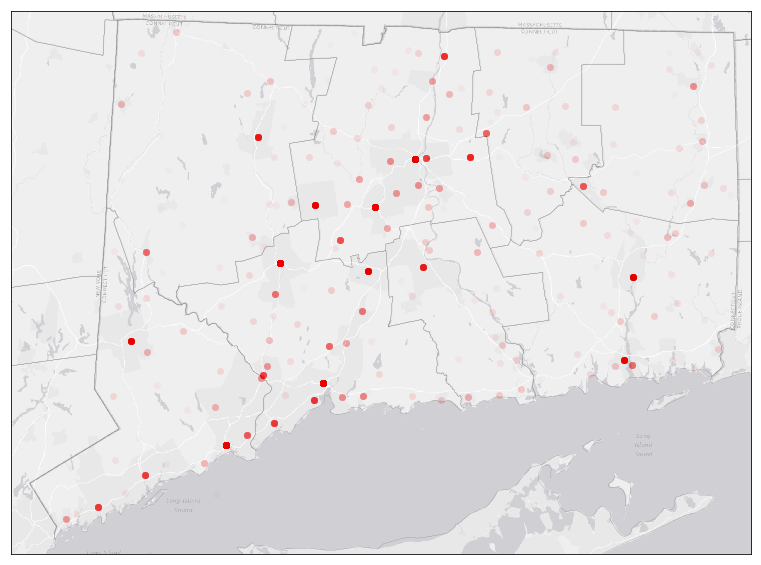

In [21]:
# extract_Lat_Long(df2['TownGeo'],lonB,latB)
dot_Density_Maps(42.068779,-71.752764,40.954090,-73.779741,layerData2=False)

## correlation between:

## using the each years data to represent deaths: education(y) - income(x) - size (death)

# 1. education - dropout
# 2. income
# 3. 


In [22]:
df.dtypes

Date                          datetime64[ns]
Sex                                   object
Race                                  object
Age                                  float64
Residence City                        object
Residence State                       object
Residence County                      object
Death City                            object
Death State                           object
Death County                          object
Location                              object
DescriptionofInjury                   object
InjuryPlace                           object
ImmediateCauseA                       object
Heroin                                object
Cocaine                               object
Fentanyl                              object
Oxycodone                             object
Oxymorphone                           object
EtOH                                  object
Hydrocodone                           object
Benzodiazepine                        object
Methadone 

forcasting drug use from income[education, poverty, happiness,...] and current drug trends

### Resampled the data based on Month

In [23]:
# drugList = [              
# 'Cocaine',              
# 'Fentanyl',               
# 'Oxycodone',                 
# # 'Oxymorphone',               
# # 'EtOH',                     
# # 'Hydrocodone',              
# # 'Benzodiazepine',           
# # 'Methadone',                 
# # 'Amphet',                    
# # 'Tramad'
# ]


dfYears = df.resample('M',on='Date').agg({'Heroin_Mapped':'sum'})
for x in drugList:
    dfYears[x] = df.resample('M',on='Date').agg({x+"_Mapped":'sum'})
dfYears.head()

,Heroin_Mapped,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad
Date,,,,,,,,,,,,
2012-01-31,14.0,14.0,8,0.0,5.0,2.0,8.0,1.0,4,5,2,0
2012-02-29,10.0,10.0,8,1.0,4.0,1.0,6.0,0.0,3,3,0,1
2012-03-31,7.0,7.0,4,1.0,6.0,3.0,2.0,3.0,6,4,0,1
2012-04-30,17.0,17.0,17,1.0,4.0,5.0,7.0,0.0,5,3,0,0
2012-05-31,13.0,13.0,10,1.0,3.0,3.0,4.0,1.0,2,2,0,0


## Total count based on City [County?]

In [24]:
drug_mapped = df.keys()[33:37]

In [25]:
# df['Death City'] = [row.upper() for row in df['Death City']]

In [26]:
dfCity = pd.DataFrame(index=df['Death City'])
for drug in drug_mapped:
    dfCity[drug]=df.groupby('Death City').agg({drug: 'sum'})

In [27]:
dfCity.head(30)

,Cocaine_Mapped,Fentanyl_Mapped,Oxycodone_Mapped,Oxymorphone_Mapped
Death City,,,,
GROTON,5.0,5.0,3.0,1.0
WATERBURY,87.0,65.0,26.0,2.0
ENFIELD,21.0,21.0,9.0,3.0
WALLINGFORD,8.0,6.0,5.0,2.0
WEST HAVEN,17.0,12.0,11.0,2.0
DANBURY,22.0,23.0,11.0,2.0
BRIDGEPORT,85.0,80.0,23.0,6.0
NEW HAVEN,84.0,64.0,28.0,2.0
DANBURY,22.0,23.0,11.0,2.0


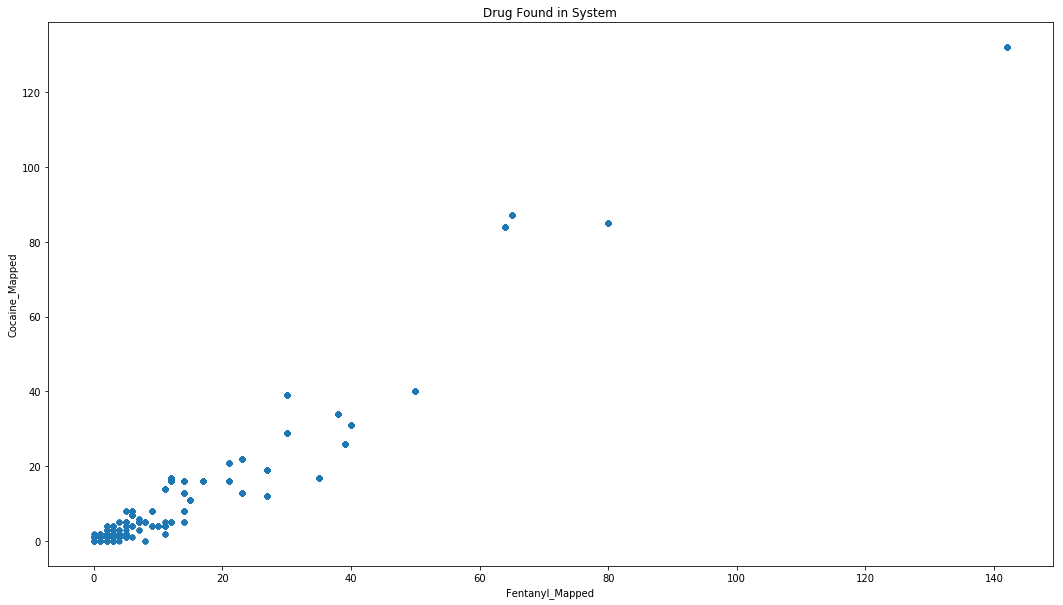

In [28]:
dfCity.plot(kind ='scatter',x = 'Fentanyl_Mapped', y='Cocaine_Mapped' ,figsize=(18, 10),title="Drug Found in System")

### Resample on day with a rolloing window of 365

(0, 1082.7)

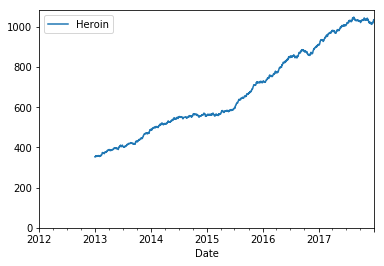

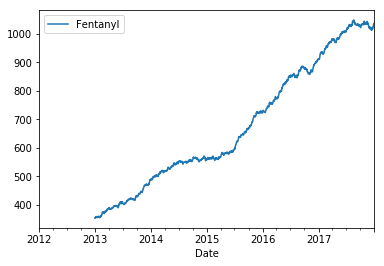

In [29]:
ax =df.resample('D',on='Date').agg({'Heroin':'count'}).rolling(365).sum().plot()
ax.set_ylim(0,None)
df.resample('D',on='Date').agg({'Fentanyl':'count'}).rolling(365).sum().plot()
ax.set_ylim(0,None)

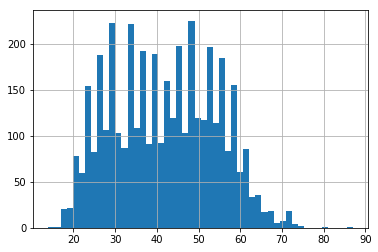

In [30]:
df['Age'].hist(bins = 50)
df['Age'].fillna(df['Age'].median(), inplace = True)

count    4081.000000
mean       41.761333
std        12.317765
min        14.000000
25%        31.000000
50%        42.000000
75%        52.000000
max        87.000000
Name: Age, dtype: float64

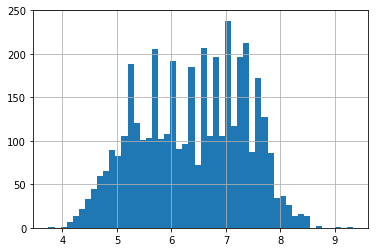

In [31]:

sqrt_transformation = df['Age'].apply(np.sqrt)
sqrt_transformation.hist(bins = 50)
df['Age'].describe()

In [32]:
df.groupby('Sex').agg({'Sex':'count'})

,Sex
Sex,
Female,1086
Male,2991


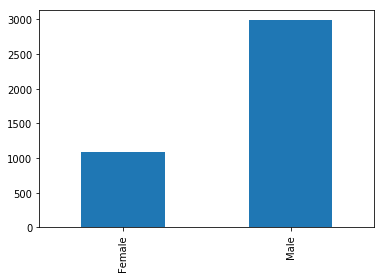

In [33]:
df["Sex"].value_counts().sort_index().plot.bar(y='gender', subplots=False, figsize=(6, 4))

http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

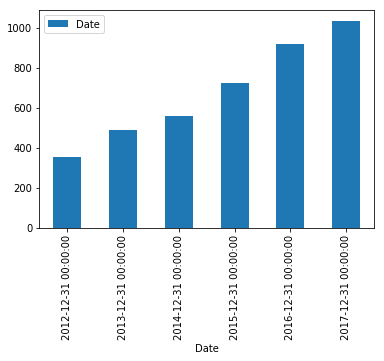

In [34]:
df.resample('A', on = 'Date').agg({"Date":'count'}).plot(kind='bar')

(0, 130.80000000000001)

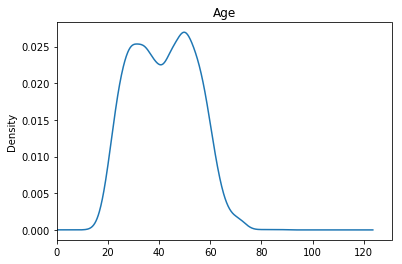

In [35]:
df["Age"].plot.density(title="Age")
plt.xlim(xmin = 0)



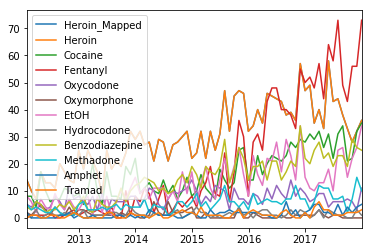

In [36]:
dfYears.groupby(dfYears.index.date).sum().plot()

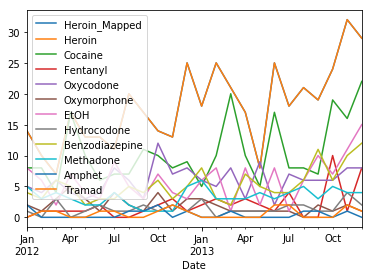

In [37]:
# start = datetime.date(datetime(2012,1,1))
# end = datetime.date(datetime(2012,12,31))

dfYears.resample('M').truncate(before = '2012-1-1', after= '2013-12-31').plot()


### Scatter Plotting Years vs Drug

(array([ 735234.,  735415.,  735599.,  735780.,  735964.,  736146.,
         736330.,  736511.,  736695.]), <a list of 9 Text xticklabel objects>)

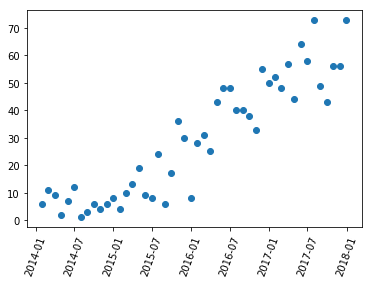

In [38]:
year2012 =dfYears.resample('M').truncate(before = '2014-1-1', after= '2018-12-31')
drugList = [              
'Cocaine',              
'Fentanyl',               
'Oxycodone',                 
# 'Oxymorphone',               
# 'EtOH',                     
# 'Hydrocodone',              
# 'Benzodiazepine',           
# 'Methadone',                 
# 'Amphet',                    
# 'Tramad'
]


#https://matplotlib.org/api/pyplot_api.html?highlight=plot_date#matplotlib.pyplot.plot_date

plt.plot_date(year2012.index, year2012['Fentanyl'])
plt.xticks(rotation=70)